# TMDB Movies Analysis EDA

## Imports

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

In [2]:
# df by client's desired year
df2000 = pd.read_csv("./Data/final_tmdb_data_2000.csv.gz")
df2001 = pd.read_csv("./Data/final_tmdb_data_2001.csv.gz")

In [3]:
# combining years into one df
combined_dfs = [df2000, df2001]
df = pd.concat(combined_dfs)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2491 entries, 0 to 1287
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2491 non-null   object 
 1   adult                  2489 non-null   float64
 2   backdrop_path          1290 non-null   object 
 3   belongs_to_collection  197 non-null    object 
 4   budget                 2489 non-null   float64
 5   genres                 2489 non-null   object 
 6   homepage               174 non-null    object 
 7   id                     2489 non-null   float64
 8   original_language      2489 non-null   object 
 9   original_title         2489 non-null   object 
 10  overview               2437 non-null   object 
 11  popularity             2489 non-null   float64
 12  poster_path            2195 non-null   object 
 13  production_companies   2489 non-null   object 
 14  production_countries   2489 non-null   object 
 15  rele

## Preprocessing Financial Filters

In [4]:
# prep NaN to 0 for financial information (i.e., values > 0 for budget OR revenue)
df['revenue'].fillna(value = 0, inplace = True)
df['budget'].fillna(value = 0, inplace = True)

In [5]:
# financial information filters
revenue_filter = df["revenue"] > 0
budget_filter = df["budget"] > 0

# combining financial info filters for revenue OR budget
fin_info = df.loc[(df['revenue'] > 0) | (df['budget'] > 0)]

In [6]:
# explore filtered financial info
fin_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 1 to 1268
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                620 non-null    object 
 1   adult                  620 non-null    float64
 2   backdrop_path          519 non-null    object 
 3   belongs_to_collection  102 non-null    object 
 4   budget                 620 non-null    float64
 5   genres                 620 non-null    object 
 6   homepage               80 non-null     object 
 7   id                     620 non-null    float64
 8   original_language      620 non-null    object 
 9   original_title         620 non-null    object 
 10  overview               617 non-null    object 
 11  popularity             620 non-null    float64
 12  poster_path            599 non-null    object 
 13  production_companies   620 non-null    object 
 14  production_countries   620 non-null    object 
 15  relea

In [7]:
# def function for millions ($)
def hundred_m(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"${x/1000000:,.0f}M"

# function test
hundred_m(120000000,0)

'$120M'

In [8]:
# creating a formatter for improved viz
price_fmt_100m = FuncFormatter(hundred_m)

## Number of Movies by Certification Category

Text(0.5, 1.0, 'Movie Count by Certification Category')

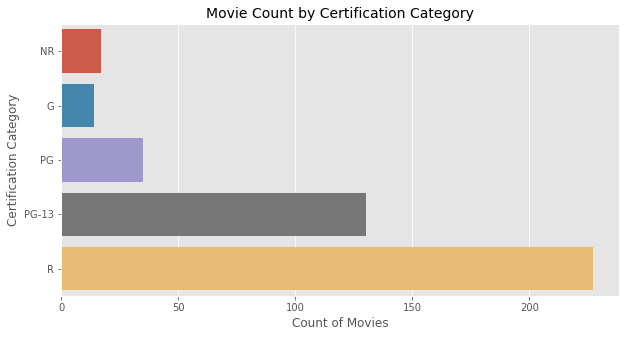

In [9]:
# set the style
plt.style.use('ggplot')

# set the size
fig, ax = plt.subplots(figsize=(10,5))

# plot bars
ax = sns.countplot(y="certification", order=["NR","G","PG","PG-13","R"] , data=fin_info)


# labels and title
plt.ylabel("Certification Category", size=12)
plt.xlabel("Count of Movies", size=12)
plt.title("Movie Count by Certification Category", size=14)

## Revenue Average by Certification Category

In [10]:
# groupby cert and rev
rev_avg = fin_info.groupby('certification')['revenue'].agg(mean_revenue = ("mean"))

#set new aggregate mean onto rev_avg
rev_avg = rev_avg.reset_index()
rev_avg.head()

,certification,mean_revenue
0,G,1.237085e+08
1,NR,8.887619e+06
2,PG,1.123378e+08
3,PG-13,9.970084e+07
4,R,3.334614e+07


Text(0.5, 1.0, 'Revenue Average by Certification Category')

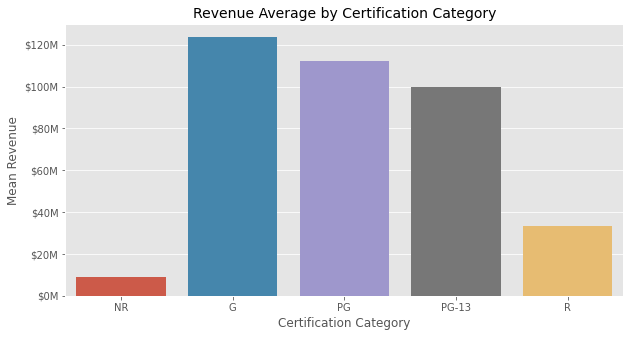

In [11]:
# set the style
plt.style.use('ggplot')

# set the size
fig, ax = plt.subplots(figsize=(10,5))
ax.yaxis.set_major_formatter(price_fmt_100m)


# plot bars
sns.barplot(x='certification', 
                y='mean_revenue', 
                order=["NR","G","PG","PG-13","R"],
                data = rev_avg) 

# labels and title
plt.ylabel("Mean Revenue", size=12)
plt.xlabel("Certification Category", size=12)
plt.title("Revenue Average by Certification Category", size=14)

## Revenue Budget by Certification Category

In [12]:
# grouping certs by budget mean
budget_avg = fin_info.groupby('certification')['budget'].agg(mean_budget = ("mean"))
budget_avg

#set new aggregate mean onto rev_avg
budget_avg = budget_avg.reset_index()
budget_avg.head()

,certification,mean_budget
0,G,4.085714e+07
1,NR,6.300006e+06
2,PG,4.497857e+07
3,PG-13,4.348391e+07
4,R,2.013149e+07


Text(0.5, 1.0, 'Budget Average by Certification Category')

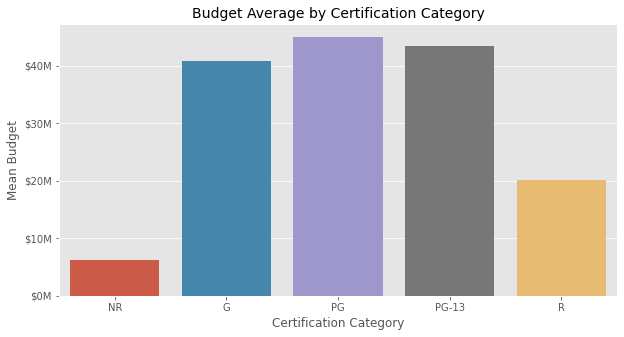

In [13]:
# set the style
plt.style.use('ggplot')

# set the size
fig, ax = plt.subplots(figsize=(10,5))
ax.yaxis.set_major_formatter(price_fmt_100m)


# plot bars
sns.barplot(x='certification', 
                y='mean_budget', 
                order=["NR","G","PG","PG-13","R"],
                data = budget_avg) 

# labels and title
plt.ylabel("Mean Budget", size=12)
plt.xlabel("Certification Category", size=12)
plt.title("Budget Average by Certification Category", size=14)

In [14]:
# final merge of all tmdb api data
fin_info.to_csv('./Data/final_results_tmdb.csv.gz', compression='gzip',index=False)